In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import scprep

In [2]:
res_dir = '../results_Mar4'

In [3]:
adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')

In [4]:
adata_t0 = adata[adata.obs['day'] == 0]
X_phate_t0 = adata_t0.obsm['X_phate']
colors = adata_t0.obs['phase']


In [5]:
colors.shape

(2837,)

<Axes: >

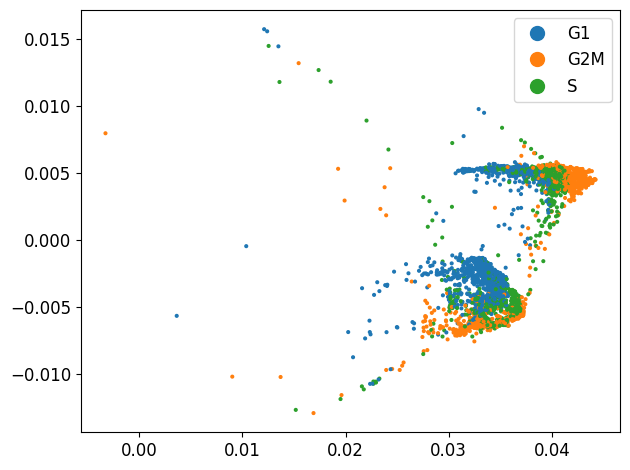

In [6]:
scprep.plot.scatter2d(X_phate_t0, c=colors)

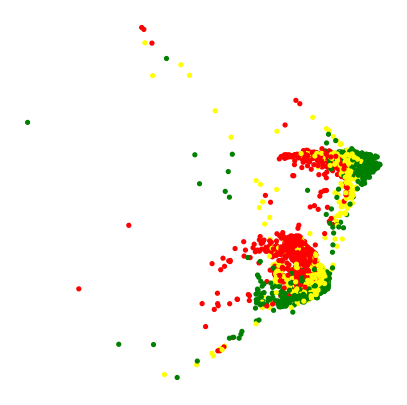

In [11]:
# Create a categorical colormap
from matplotlib.colors import ListedColormap
import numpy as np

# Convert categorical labels to numeric values for colormap
unique_phases = colors.cat.categories
phase_to_num = {phase: i for i, phase in enumerate(unique_phases)}
color_nums = np.array([phase_to_num[phase] for phase in colors])

# Create a custom colormap
cmap = ListedColormap(['red', 'green', 'yellow'])  # G1, G2M, S colors

plt.figure(figsize=(5, 5))
scatter = plt.scatter(X_phate_t0[:, 0], X_phate_t0[:, 1], c=color_nums, cmap=cmap, s=7.5)
plt.box(False)
plt.tick_params(left=False, bottom=False)
plt.xticks([])
plt.yticks([])

plt.savefig(f'{res_dir}/cell_cycle.pdf', bbox_inches='tight', transparent=True, dpi=300)

# Add a colorbar legend
# cbar = plt.colorbar(ticks=range(len(unique_phases)))
# cbar.set_ticklabels(unique_phases)

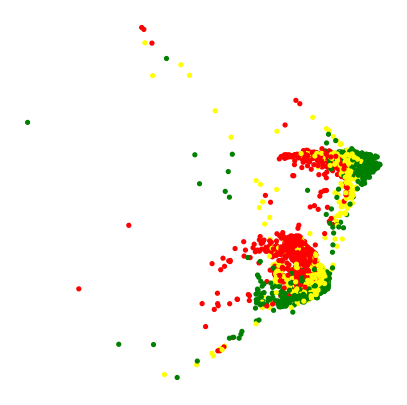

In [12]:
# Create a categorical colormap
from matplotlib.colors import ListedColormap
import numpy as np

# Convert categorical labels to numeric values for colormap
unique_phases = colors.cat.categories
phase_to_num = {phase: i for i, phase in enumerate(unique_phases)}
color_nums = np.array([phase_to_num[phase] for phase in colors])

# Create a custom colormap
cmap = ListedColormap(['red', 'green', 'yellow'])  # G1, G2M, S colors

plt.figure(figsize=(5, 5))
scatter = plt.scatter(X_phate_t0[:, 0], X_phate_t0[:, 1], c=color_nums, cmap=cmap, s=7.5)
plt.box(False)
plt.tick_params(left=False, bottom=False)
plt.xticks([])
plt.yticks([])

plt.savefig(f'{res_dir}/cell_cycle.pdf', bbox_inches='tight', transparent=True, dpi=300)

# Add a colorbar legend
# cbar = plt.colorbar(ticks=range(len(unique_phases)))
# cbar.set_ticklabels(unique_phases)

Original points: 2837
After removing outliers: 2804


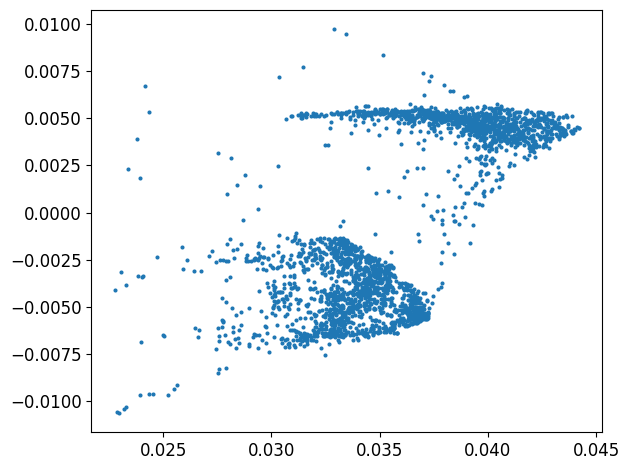

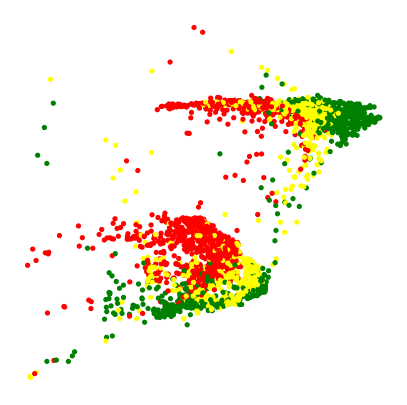

In [13]:
# Remove outliers from the PHATE embedding
from scipy import stats
import numpy as np

# Get the PHATE coordinates
phate_coords = adata_t0.obsm['X_phate']

# Calculate Z-scores for each dimension
z_scores = np.abs(stats.zscore(phate_coords))

# Define threshold for outliers (typically 3)
threshold = 3

# Find indices of non-outlier points
non_outlier_mask = np.all(z_scores < threshold, axis=1)

# Filter the AnnData object to keep only non-outliers
adata_t0_filtered = adata_t0[non_outlier_mask].copy()

print(f"Original points: {phate_coords.shape[0]}")
print(f"After removing outliers: {adata_t0_filtered.shape[0]}")

scprep.plot.scatter2d(adata_t0_filtered.obsm['X_phate'])
# Update the reference to use the filtered data
# adata_t0 = adata_t0_filtered

# Display the filtered PHATE embedding
# adata_t0.obsm['X_phate']

# Create a categorical colormap
from matplotlib.colors import ListedColormap
import numpy as np

# Get the phase information from the filtered data
filtered_phases = adata_t0_filtered.obs['phase']

# Convert categorical labels to numeric values for colormap
unique_phases = filtered_phases.cat.categories
phase_to_num = {phase: i for i, phase in enumerate(unique_phases)}
color_nums = np.array([phase_to_num[phase] for phase in filtered_phases])

# Create a custom colormap
cmap = ListedColormap(['red', 'green', 'yellow'])  # G1, G2M, S colors

plt.figure(figsize=(5, 5))
scatter = plt.scatter(
    adata_t0_filtered.obsm['X_phate'][:, 0], 
    adata_t0_filtered.obsm['X_phate'][:, 1], 
    c=color_nums, 
    cmap=cmap, 
    s=7.5
)
plt.box(False)
plt.tick_params(left=False, bottom=False)
plt.xticks([])
plt.yticks([])

plt.savefig(f'{res_dir}/cell_cycle_drop_outliers.pdf', bbox_inches='tight', transparent=True, dpi=300)

# Add a colorbar legend
# cbar = plt.colorbar(ticks=range(len(unique_phases)))
# cbar.set_ticklabels(unique_phases)

In [43]:
np.save(f'{res_dir}/day0_filtered_barcodes.npy', adata_t0_filtered.obs_names.values)

<Axes: >

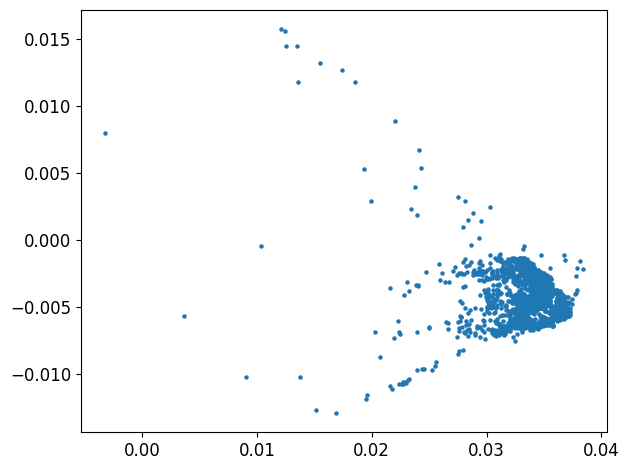

In [32]:
scprep.plot.scatter2d(adata_t0_0.obsm['X_phate'])

Original points: 1626
After removing outliers: 1590


<Axes: >

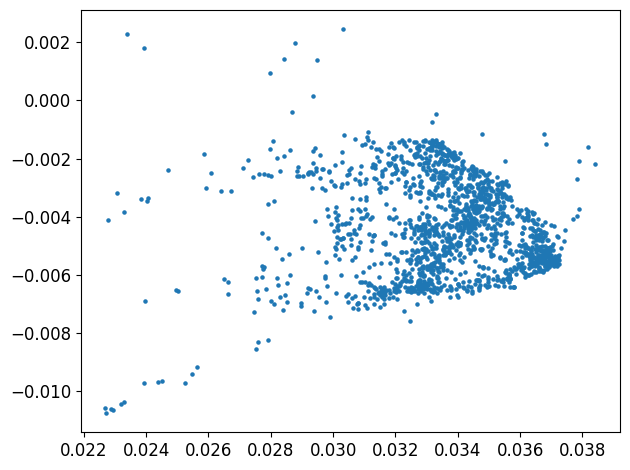

In [34]:
# Remove outliers from the PHATE embedding
from scipy import stats
import numpy as np

# Get the PHATE coordinates
phate_coords = adata_t0_0.obsm['X_phate']

# Calculate Z-scores for each dimension
z_scores = np.abs(stats.zscore(phate_coords))

# Define threshold for outliers (typically 3)
threshold = 3

# Find indices of non-outlier points
non_outlier_mask = np.all(z_scores < threshold, axis=1)

# Filter the AnnData object to keep only non-outliers
adata_t0_0_filtered = adata_t0_0[non_outlier_mask].copy()

print(f"Original points: {phate_coords.shape[0]}")
print(f"After removing outliers: {adata_t0_0_filtered.shape[0]}")

scprep.plot.scatter2d(adata_t0_0_filtered.obsm['X_phate'])
# Update the reference to use the filtered data
# adata_t0_0 = adata_t0_0_filtered

# Display the filtered PHATE embedding
# adata_t0_0.obsm['X_phate']

In [26]:
genes_to_plot = ['EPCAM', 'CAV1', 'MMP7', 'VCAN', 'ANXA5', 'CD44']

# Check if each gene is in adata.var_names
for gene in genes_to_plot:
    assert gene in adata.var_names, f"Gene {gene} not found in dataset"

In [27]:
gene = genes_to_plot[0]

In [47]:
import magic

In [57]:
magic_op = magic.MAGIC()
magic_op.fit(adata.obsm['X_pca'])
denoised_expr = magic_op.transform(adata[:,genes_to_plot].to_df())


Running MAGIC on 16985 cells and 50 genes.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 28.51 seconds.
  Calculating affinities...
  Calculated affinities in 17.89 seconds.
Calculated graph and diffusion operator in 46.44 seconds.
Calculating imputation...


/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/magic/magic.py:541: UserWarning: Running MAGIC.transform on different data to that which was used for MAGIC.fit may not produce sensible output, unless it comes from the same manifold.
  warnings.warn(


In [58]:
denoised_expr_00 = denoised_expr.loc[adata_t0_0_filtered.obs_names,:]

<Axes: >

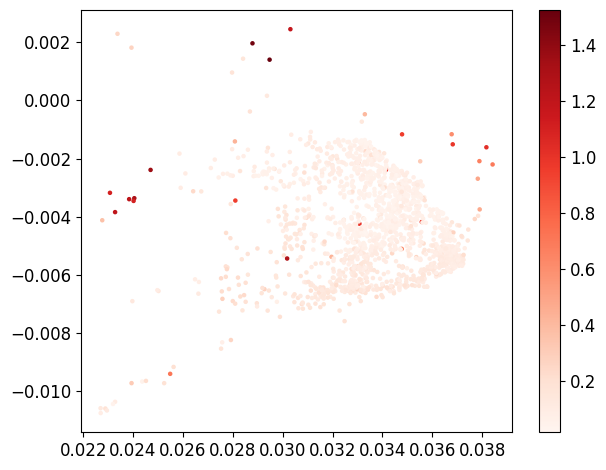

In [59]:
scprep.plot.scatter2d(adata_t0_0_filtered.obsm['X_phate'], denoised_expr_00[gene], cmap='Reds')